In [ ]:
import pandas as pd

mc_df = pd.read_json(r'modcloth_final_data.json\modcloth_final_data.json', lines=True)
(mc_df.head())

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


*Sonnv*

Tôi dự định thực hiện bài này như một nhiệm vụ Phân tích Dữ liệu Khám phá (Exploratory Data Analysis - EDA) đơn giản nhưng kỹ lưỡng bằng Python, seaborn và matplotlib.

### Mục lục:

1. [Về bộ dữ liệu](#1)
2. [Nhập dữ liệu - Modcloth](#3)
3. [EDA & Tiền xử lý](#4)
   1. [Biểu đồ hộp (Boxplot) của các biến số](#5)
   2. [Xử lý các giá trị ngoại lai (Outliers)](#6)
   3. [Phân phối kết hợp của bra_size và size](#7)
4. [Làm sạch & Tiền xử lý dữ liệu](#8)
   1. [Phân phối ban đầu của các đặc trưng](#9)
   2. [Xử lý đặc trưng từng bước](#10)
      1. [Kỹ thuật đặc trưng (Feature Engineering) - thêm đặc trưng mới](#11)
5. [EDA thông qua Trực quan hóa](#12)
   1. [Phân phối của các đặc trưng](#13)
   2. [Các danh mục (Categories) so với Độ vừa vặn/Chiều dài/Chất lượng (Fit/Length/Quality)](#14)
   3. [Người dùng (Users) so với Số lượng mặt hàng đã mua (Items bought)](#15)
   4. [Chiều cao (Height) so với Cỡ giày (Shoe-size)](#16)
6. [Tài liệu tham khảo](#references)
7. [Các giả định](#assumptions)


<a id="1"></a>
### Về bộ dữ liệu

> Bộ dữ liệu này chứa phản hồi về độ vừa vặn của quần áo do khách hàng tự báo cáo cũng như các thông tin phụ khác như đánh giá, xếp hạng, danh mục sản phẩm, kích cỡ theo danh mục, số đo của khách hàng (v.v.) từ 2 trang web:
>
> 1. [Modcloth](http://modcloth.com)
> 2. [Renttherunway](http://renttherunway.com)
>
> [[1]](#references) ModCloth bán quần áo và phụ kiện cổ điển dành cho phụ nữ, từ đó người quản lý bộ dữ liệu đã thu thập dữ liệu từ ba danh mục: váy, áo và quần. RentTheRunWay là một nền tảng độc đáo cho phép phụ nữ thuê quần áo cho các dịp khác nhau; họ đã thu thập dữ liệu từ một số danh mục.
>
> **Lưu ý:** Trong cả hai bộ dữ liệu, phản hồi về độ vừa vặn thuộc một trong ba loại: ‘Nhỏ’ (Small), ‘Vừa’ (Fit) và ‘Lớn’ (Large). Và cũng có một số [giả định](#assumptions) đã được đưa ra về các đặc trưng trong bộ dữ liệu.

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

# Suppressing all warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input'

<a id="2"></a>
# Bộ dữ liệu [Modcloth](http://modcloth.com)
<a id="3"></a>
## Nhập dữ liệu bằng Pandas

Xem qua một vài dòng đầu tiên của tệp json dữ liệu modcloth bằng lệnh bash tích hợp `head` của hệ điều hành.

In [18]:
# Execute this in your kernel to view the first n (here-4) lines of the json file.
! head -n 4 ../input/modcloth_final_data.json

'head' is not recognized as an internal or external command,
operable program or batch file.


Sử dụng hàm `pd.read_json()`, tệp json được đưa vào một DataFrame của pandas, với tham số `lines` là `True` - bởi vì mỗi đối tượng mới được phân tách bằng một dòng mới.

In [ ]:
# Code Here
import pandas as pd
mc_df = pd.read_json('modcloth_final_data.json/modcloth_final_data.json', lines = 'True')
mc_df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


<a id="4"></a>
# EDA - Phân tích Dữ liệu Khám phá

Chúng ta đã có thể đưa ra một vài quan sát ở đây, bằng cách nhìn vào phần đầu của dữ liệu:

1. Có các giá trị bị thiếu (missing values) trong DataFrame, cần phải được xử lý.
2. Cột `cup_size` chứa nhiều sở thích khác nhau - sẽ cần xử lý nếu chúng ta muốn định nghĩa `cup_size` là kiểu dữ liệu 'category'.
3. Cột `height` cần được phân tích cú pháp để trích xuất chiều cao dưới dạng một đại lượng số, hiện tại nó trông giống như một chuỗi (object).
4. Không quá quan trọng, nhưng một số cột có thể cần đổi tên - để loại bỏ khoảng trắng.

Đầu tiên, chúng ta xử lý việc đặt tên các cột để dễ dàng truy cập trong pandas.
Tên sau khi đổi tên:

['bra_size', 'bust', 'category', 'cup_size', 'fit', 'height', 'hips',
'item_id', 'length', 'quality', 'review_summary', 'review_text',
'shoe_size', 'shoe_width', 'size', 'user_id', 'user_name', 'waist']

In [21]:
mc_df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [ ]:
## Rename the columns
# Bài tập 4: Kiểm tra và đổi tên cột
if 'mc_df' in locals():
    print("Tên cột ban đầu:")
    print(mc_df.columns.tolist())
    ...
else:
    print("DataFrame 'mc_df' chưa được tải. Vui lòng chạy lại ô nhập dữ liệu.")

if 'mc_df' in locals():
    mc_df.columns = mc_df.columns.str.replace(' ', '_')

    print("\nTên cột sau khi đổi tên:")
    print(mc_df.columns.tolist())
    ...
else:
    print("DataFrame 'mc_df' chưa được tải.")

Tên cột ban đầu:
['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size', 'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id', 'shoe_size', 'shoe_width', 'review_summary', 'review_text']

Tên cột sau khi đổi tên:
['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size', 'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id', 'shoe_size', 'shoe_width', 'review_summary', 'review_text']


In [ ]:
## Shown info of dataa
if 'mc_df' in locals():
    print("Thông tin DataFrame:")
    mc_df.info()
else:
    print("DataFrame 'mc_df' chưa được tải.")

Thông tin DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra_size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27915 non-null  float64
 15  shoe_width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_tex

Chúng ta có thể mở rộng các quan sát của mình về dữ liệu bị thiếu và các kiểu dữ liệu ở đây:

* Trong số 18 cột, chỉ có 6 cột có dữ liệu đầy đủ.
* Khá nhiều dữ liệu dường như bị thiếu trong các cột `bust`, `shoe width`, `shoe size` và `waist`.
* Chúng ta có thể muốn đặc biệt xem xét các mặt hàng **có** `shoe size` và `shoe width` - đây có thể là giày!
* Rất nhiều cột có kiểu dữ liệu chuỗi (object), cần được phân tích cú pháp thành kiểu dữ liệu category (cũng hỗ trợ tiêu thụ bộ nhớ hiệu quả).
* Cột `waist` đáng ngạc nhiên lại có rất nhiều giá trị NULL - xét rằng hầu hết dữ liệu từ Modcloth đến từ 3 danh mục 'váy, áo và quần'.

### Xem xét tỷ lệ phần trăm giá trị bị thiếu trên mỗi cột

In [26]:
### Calculate total missing data and perc miss

# Bài tập 6: Tính toán và hiển thị dữ liệu bị thiếu
if 'mc_df' in locals():
    # Tính tổng số giá trị bị thiếu cho mỗi cột, sắp xếp giảm dần
    total_missing = mc_df.isnull().sum().sort_values(ascending=False)

    # Tính tỷ lệ phần trăm giá trị bị thiếu cho mỗi cột, sắp xếp theo total_missing
    percent_missing = (total_missing / len(mc_df) * 100).sort_values(ascending=False)

    # Ghép hai kết quả trên thành một DataFrame mới
    missing_data = pd.DataFrame({
        'Tổng số thiếu': total_missing,
        'Tỷ lệ % thiếu': percent_missing
    })

    print("Dữ liệu bị thiếu theo cột:")
    print(missing_data)
else:
    print("DataFrame 'mc_df' chưa được tải.")


Dữ liệu bị thiếu theo cột:
                Tổng số thiếu  Tỷ lệ % thiếu
waist                   79908      96.518903
bust                    70936      85.681846
shoe_width              64183      77.525063
shoe_size               54875      66.282160
hips                    26726      32.281677
review_summary           6725       8.122962
review_text              6725       8.122962
cup_size                 6255       7.555260
bra_size                 6018       7.268994
height                   1107       1.337118
quality                    68       0.082136
length                     35       0.042276
item_id                     0       0.000000
size                        0       0.000000
category                    0       0.000000
user_id                     0       0.000000
user_name                   0       0.000000
fit                         0       0.000000


### Statistical description of numerical variables

In [ ]:
## Statistical description

import numpy as np
# Bài tập 7: Hiển thị mô tả thống kê cho các cột số
if 'mc_df' in locals():
    print("Mô tả thống kê các biến số:")
    print(mc_df.describe(include = [np.number]))
    ...
else:
    print("DataFrame 'mc_df' chưa được tải.")

Mô tả thống kê các biến số:
             item_id        waist          size       quality          hips  \
count   82790.000000  2882.000000  82790.000000  82722.000000  56064.000000   
mean   469325.229170    31.319223     12.661602      3.949058     40.358501   
std    213999.803314     5.302849      8.271952      0.992783      5.827166   
min    123373.000000    20.000000      0.000000      1.000000     30.000000   
25%    314980.000000    28.000000      8.000000      3.000000     36.000000   
50%    454030.000000    30.000000     12.000000      4.000000     39.000000   
75%    658440.000000    34.000000     15.000000      5.000000     43.000000   
max    807722.000000    50.000000     38.000000      5.000000     60.000000   

           bra_size        user_id     shoe_size  
count  76772.000000   82790.000000  27915.000000  
mean      35.972125  498849.564718      8.145818  
std        3.224907  286356.969459      1.336109  
min       28.000000       6.000000      5.000000  
25%  

Một số quan sát quan trọng hơn ở đây, trước khi chúng ta đi sâu vào thực hiện các tác vụ tiền xử lý trên dữ liệu của mình:

* `bra_size`, `hips` có thể không cần phải là float - kiểu dữ liệu category?
* Hầu hết các cỡ giày là khoảng 5-9, nhưng cỡ giày tối đa là 38! (Điều này đáng ngạc nhiên vì trang web sử dụng cỡ giày của Anh - UK sizing.)
* `size` có giá trị tối thiểu là 0 và `size` tối đa khớp với cỡ giày tối đa.

Hãy trực quan hóa các đại lượng số trong bộ dữ liệu của chúng ta dưới dạng biểu đồ hộp (boxplots), để có cảm nhận tốt hơn về các giá trị ngoại lai.

<a id="5"></a>
## Biểu đồ hộp của các biến số

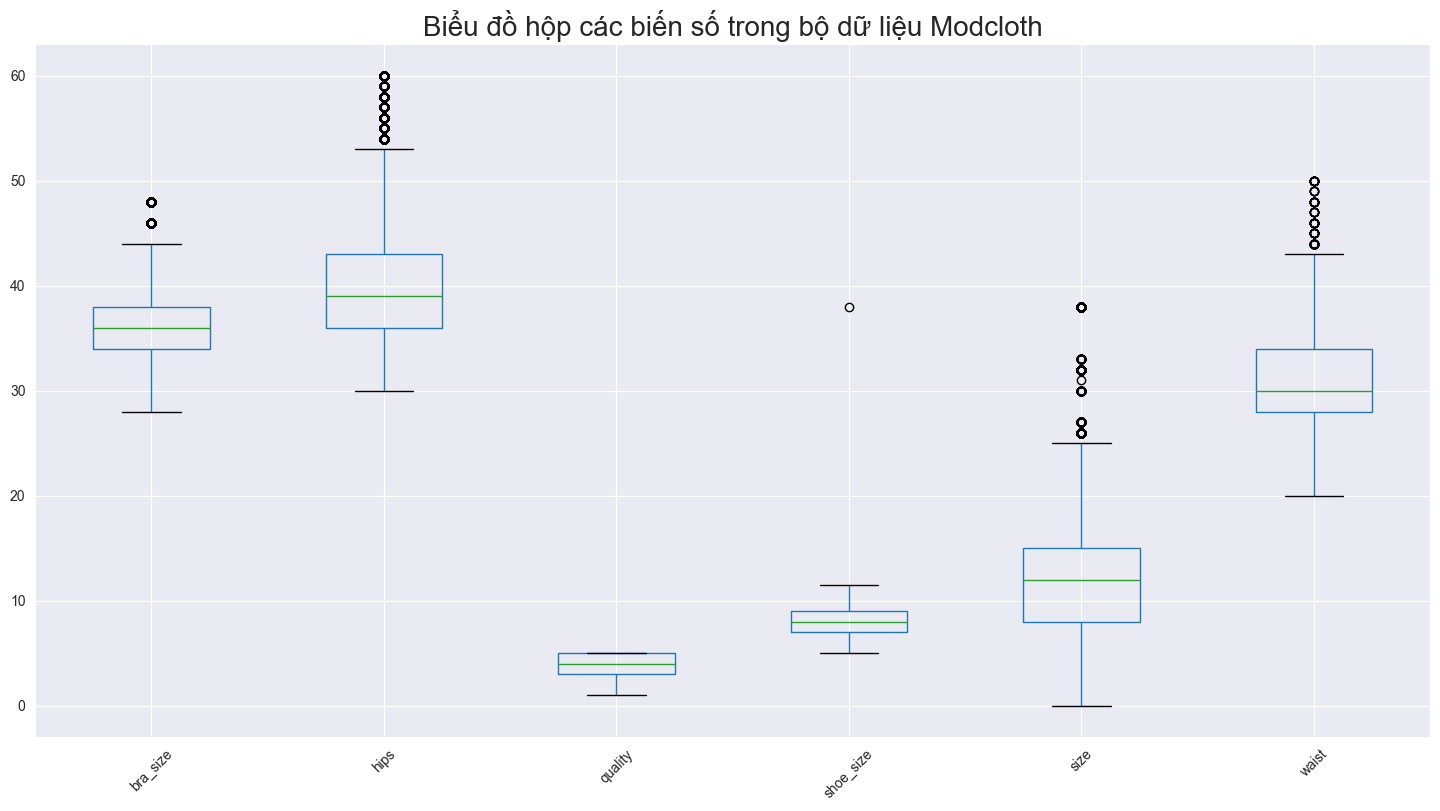

In [ ]:
# Bài tập 8: Vẽ biểu đồ hộp cho các biến số
import matplotlib.pyplot as plt
if 'mc_df' in locals():
    # Chọn các cột số tiềm năng để vẽ boxplot
    num_cols = ['bra_size', 'hips', 'quality', 'shoe_size', 'size', 'waist']

    valid_num_cols = [col for col in num_cols if col in mc_df.columns and np.issubdtype(mc_df[col].dtype, np.number)]

    if valid_num_cols:
        plt.figure(figsize=(18, 9))
        mc_df[valid_num_cols].dropna(axis=1, how='all').boxplot()
        plt.title("Biểu đồ hộp các biến số trong bộ dữ liệu Modcloth", fontsize=20)
        plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
        plt.show()
    else:
        print("Không tìm thấy cột số hợp lệ nào để vẽ biểu đồ hộp.")
else:
    print("DataFrame 'mc_df' chưa được tải.")


<a id="6"></a>
## Xử lý các giá trị ngoại lai

* **shoe_size**:
  Chúng ta có thể thấy rõ rằng giá trị tối đa duy nhất của cỡ giày (38) là một giá trị ngoại lai và lý tưởng nhất là chúng ta nên loại bỏ hàng đó hoặc xử lý giá trị ngoại lai đó. Hãy xem xét mục nhập đó trong dữ liệu của chúng ta.

In [ ]:
# Bài tập 9: Tìm và hiển thị hàng có giá trị shoe_size ngoại lai
if 'mc_df' in locals() and 'shoe_size' in mc_df.columns:
    # Tìm giá trị lớn nhất trong cột 'shoe_size'
    max_shoe_size = mc_df['shoe_size'].max()
    print(f"Giá trị shoe_size lớn nhất: {max_shoe_size}")

    # Lọc và hiển thị các hàng có 'shoe_size' bằng với giá trị lớn nhất tìm được
    outlier_rows = mc_df[mc_df['shoe_size'] == max_shoe_size]
    print(f"\nCác hàng có shoe_size = {max_shoe_size}:")
    print(outlier_rows)
else:
    print("DataFrame 'mc_df' chưa được tải hoặc không có cột 'shoe_size'.")


Giá trị shoe_size lớn nhất: 38.0

Các hàng có shoe_size = 38.0:
       item_id  waist  size  quality cup_size  hips  bra_size category   bust  \
37313   416942   35.0    12      5.0        d  46.0      36.0      new  37-39   

        height   user_name      length  fit  user_id  shoe_size shoe_width  \
37313  5ft 5in  Catslittle  just right  fit   237498       38.0    average   

                              review_summary  \
37313  Cardigans are best item Mod Cloth has   

                                             review_text  
37313  I love these cardigans, my favorite, good fabr...  


> Chúng ta có thể thấy rằng mục nhập có vẻ hợp lệ, ngoại trừ cỡ giày - nó có thể bị khách hàng nhập sai hoặc đơn giản là nhiễu. Chúng ta sẽ nhập giá trị này là null (NaN) vào lúc này.

In [30]:
import numpy as np

if 'mc_df' in locals() and 'shoe_size' in mc_df.columns:
    max_shoe_size = 38  # Giá trị ngoại lai đã xác định
    if max_shoe_size in mc_df['shoe_size'].values:
        # Thay thế giá trị shoe_size == max_shoe_size bằng np.nan
        mc_df.loc[mc_df['shoe_size'] == max_shoe_size, 'shoe_size'] = np.nan
        print(f"Đã thay thế giá trị shoe_size = {max_shoe_size} bằng NaN.")
    else:
        print(f"Không tìm thấy giá trị shoe_size = {max_shoe_size} để thay thế.")
else:
    print("DataFrame 'mc_df' chưa được tải hoặc không có cột 'shoe_size'.")


Đã thay thế giá trị shoe_size = 38 bằng NaN.


* **bra_size**:
  Chúng ta có thể xem xét 10 cỡ áo ngực hàng đầu (chúng ta có thể thấy rằng biểu đồ hộp hiển thị 2 giá trị là ngoại lai, theo IQR - Khoảng tứ phân vị).

In [31]:
# Bài tập 11: Khám phá phân phối và ngoại lai của bra_size
if 'mc_df' in locals() and 'bra_size' in mc_df.columns:
    # Đếm số lần xuất hiện của mỗi giá trị trong cột 'bra_size'
    bra_size_counts = mc_df['bra_size'].value_counts().sort_index()
    print("Số lượng theo bra_size (10 giá trị phổ biến nhất):")
    print(bra_size_counts.head(10))

    # Tính Q1, Q3, IQR để xác định ngưỡng ngoại lai
    Q1 = mc_df['bra_size'].quantile(0.25)
    Q3 = mc_df['bra_size'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    print(f"\nNgưỡng trên cho ngoại lai bra_size (Q3 + 1.5*IQR): {upper_bound}")
    print(f"Ngưỡng dưới cho ngoại lai bra_size (Q1 - 1.5*IQR): {lower_bound}")

    # Tìm các giá trị duy nhất có thể là ngoại lai
    potential_outliers = mc_df[
        (mc_df['bra_size'] > upper_bound) | (mc_df['bra_size'] < lower_bound)
    ]['bra_size'].unique()
    print(f"\nCác giá trị bra_size có thể là ngoại lai: {potential_outliers}")

    # Hiển thị 10 hàng có giá trị bra_size lớn nhất
    if not mc_df['bra_size'].isnull().all():
        largest_bra_sizes = mc_df.nlargest(10, 'bra_size')
        print("\n10 hàng có bra_size lớn nhất:")
        print(largest_bra_sizes[['bra_size', 'cup_size', 'size', 'category']])
    else:
        print("\nCột 'bra_size' không có giá trị số hoặc rỗng.")
else:
    print("DataFrame 'mc_df' chưa được tải hoặc không có cột 'bra_size'.")


Số lượng theo bra_size (10 giá trị phổ biến nhất):
bra_size
28.0      258
30.0     1052
32.0    10026
34.0    22412
36.0    19624
38.0    11923
40.0     5115
42.0     3373
44.0     2014
46.0      596
Name: count, dtype: int64

Ngưỡng trên cho ngoại lai bra_size (Q3 + 1.5*IQR): 44.0
Ngưỡng dưới cho ngoại lai bra_size (Q1 - 1.5*IQR): 28.0

Các giá trị bra_size có thể là ngoại lai: [46. 48.]

10 hàng có bra_size lớn nhất:
      bra_size cup_size  size category
216       48.0        d    38      new
634       48.0        c    33      new
1217      48.0        c    32      new
1281      48.0     dd/e    38      new
1370      48.0        c    38      new
1372      48.0        c    38      new
1428      48.0    ddd/f    38      new
1801      48.0        c    32      new
1968      48.0     dd/e    32      new
2890      48.0       aa    26      new


<a id="7"></a>
## Phân phối kết hợp của bra_size và size

Chúng ta có thể trực quan hóa sự phân phối của `bra_size` so với `size` (hai biến) để hiểu về các giá trị.

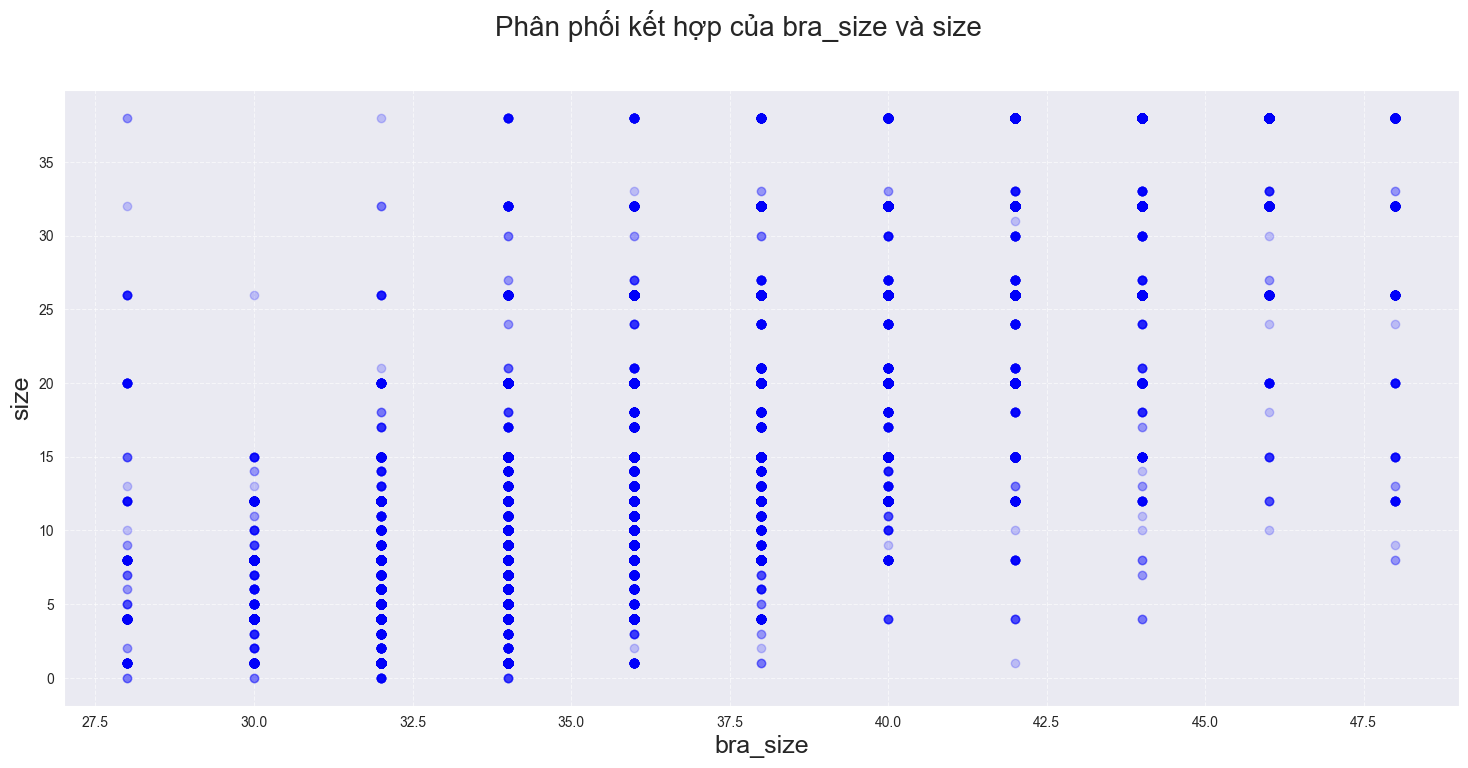

In [32]:
import matplotlib.pyplot as plt

# Bài tập 12: Vẽ biểu đồ phân tán (scatter plot) cho bra_size và size
if 'mc_df' in locals() and 'bra_size' in mc_df.columns and 'size' in mc_df.columns:
    # Đảm bảo cả hai cột đều là số
    mc_df['bra_size'] = pd.to_numeric(mc_df['bra_size'], errors='coerce')
    mc_df['size'] = pd.to_numeric(mc_df['size'], errors='coerce')

    # Bỏ các giá trị NaN để tránh lỗi khi vẽ
    plot_df = mc_df.dropna(subset=['bra_size', 'size'])

    plt.figure(figsize=(18, 8))
    plt.xlabel("bra_size", fontsize=18)
    plt.ylabel("size", fontsize=18)
    plt.suptitle("Phân phối kết hợp của bra_size và size", fontsize=20)

    # Vẽ biểu đồ phân tán
    plt.scatter(
        plot_df['bra_size'],
        plot_df['size'],
        marker='o',
        alpha=0.2,
        color='blue'
    )

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
else:
    print("❌ DataFrame 'mc_df' chưa được tải hoặc thiếu cột 'bra_size'/'size'.")


> Chúng ta không thể thấy bất kỳ độ lệch đáng kể nào so với hành vi thông thường đối với `bra_size`, thực tế đối với tất cả các biến số khác cũng vậy - chúng ta có thể mong đợi các giá trị ngoại lai 'rõ ràng', từ biểu đồ hộp, sẽ hoạt động tương tự. Bây giờ, chúng ta sẽ chuyển sang tiền xử lý bộ dữ liệu để có các trực quan hóa phù hợp.
>
> <a id="8"></a>
> # Làm sạch & Tiền xử lý dữ liệu
>
> Hãy xử lý các biến và thay đổi kiểu dữ liệu (dtype) thành loại phù hợp cho mỗi cột. Trước tiên, chúng ta định nghĩa một hàm để tạo biểu đồ phân phối của các biến khác nhau. Đây là phân phối ban đầu của các đặc trưng.
>
> **Lưu ý: Các biểu đồ phân phối cuối cùng ở [bên dưới](#dist_plots).**
>
> <a id="9"></a>
> ### Phân phối ban đầu của các đặc trưng

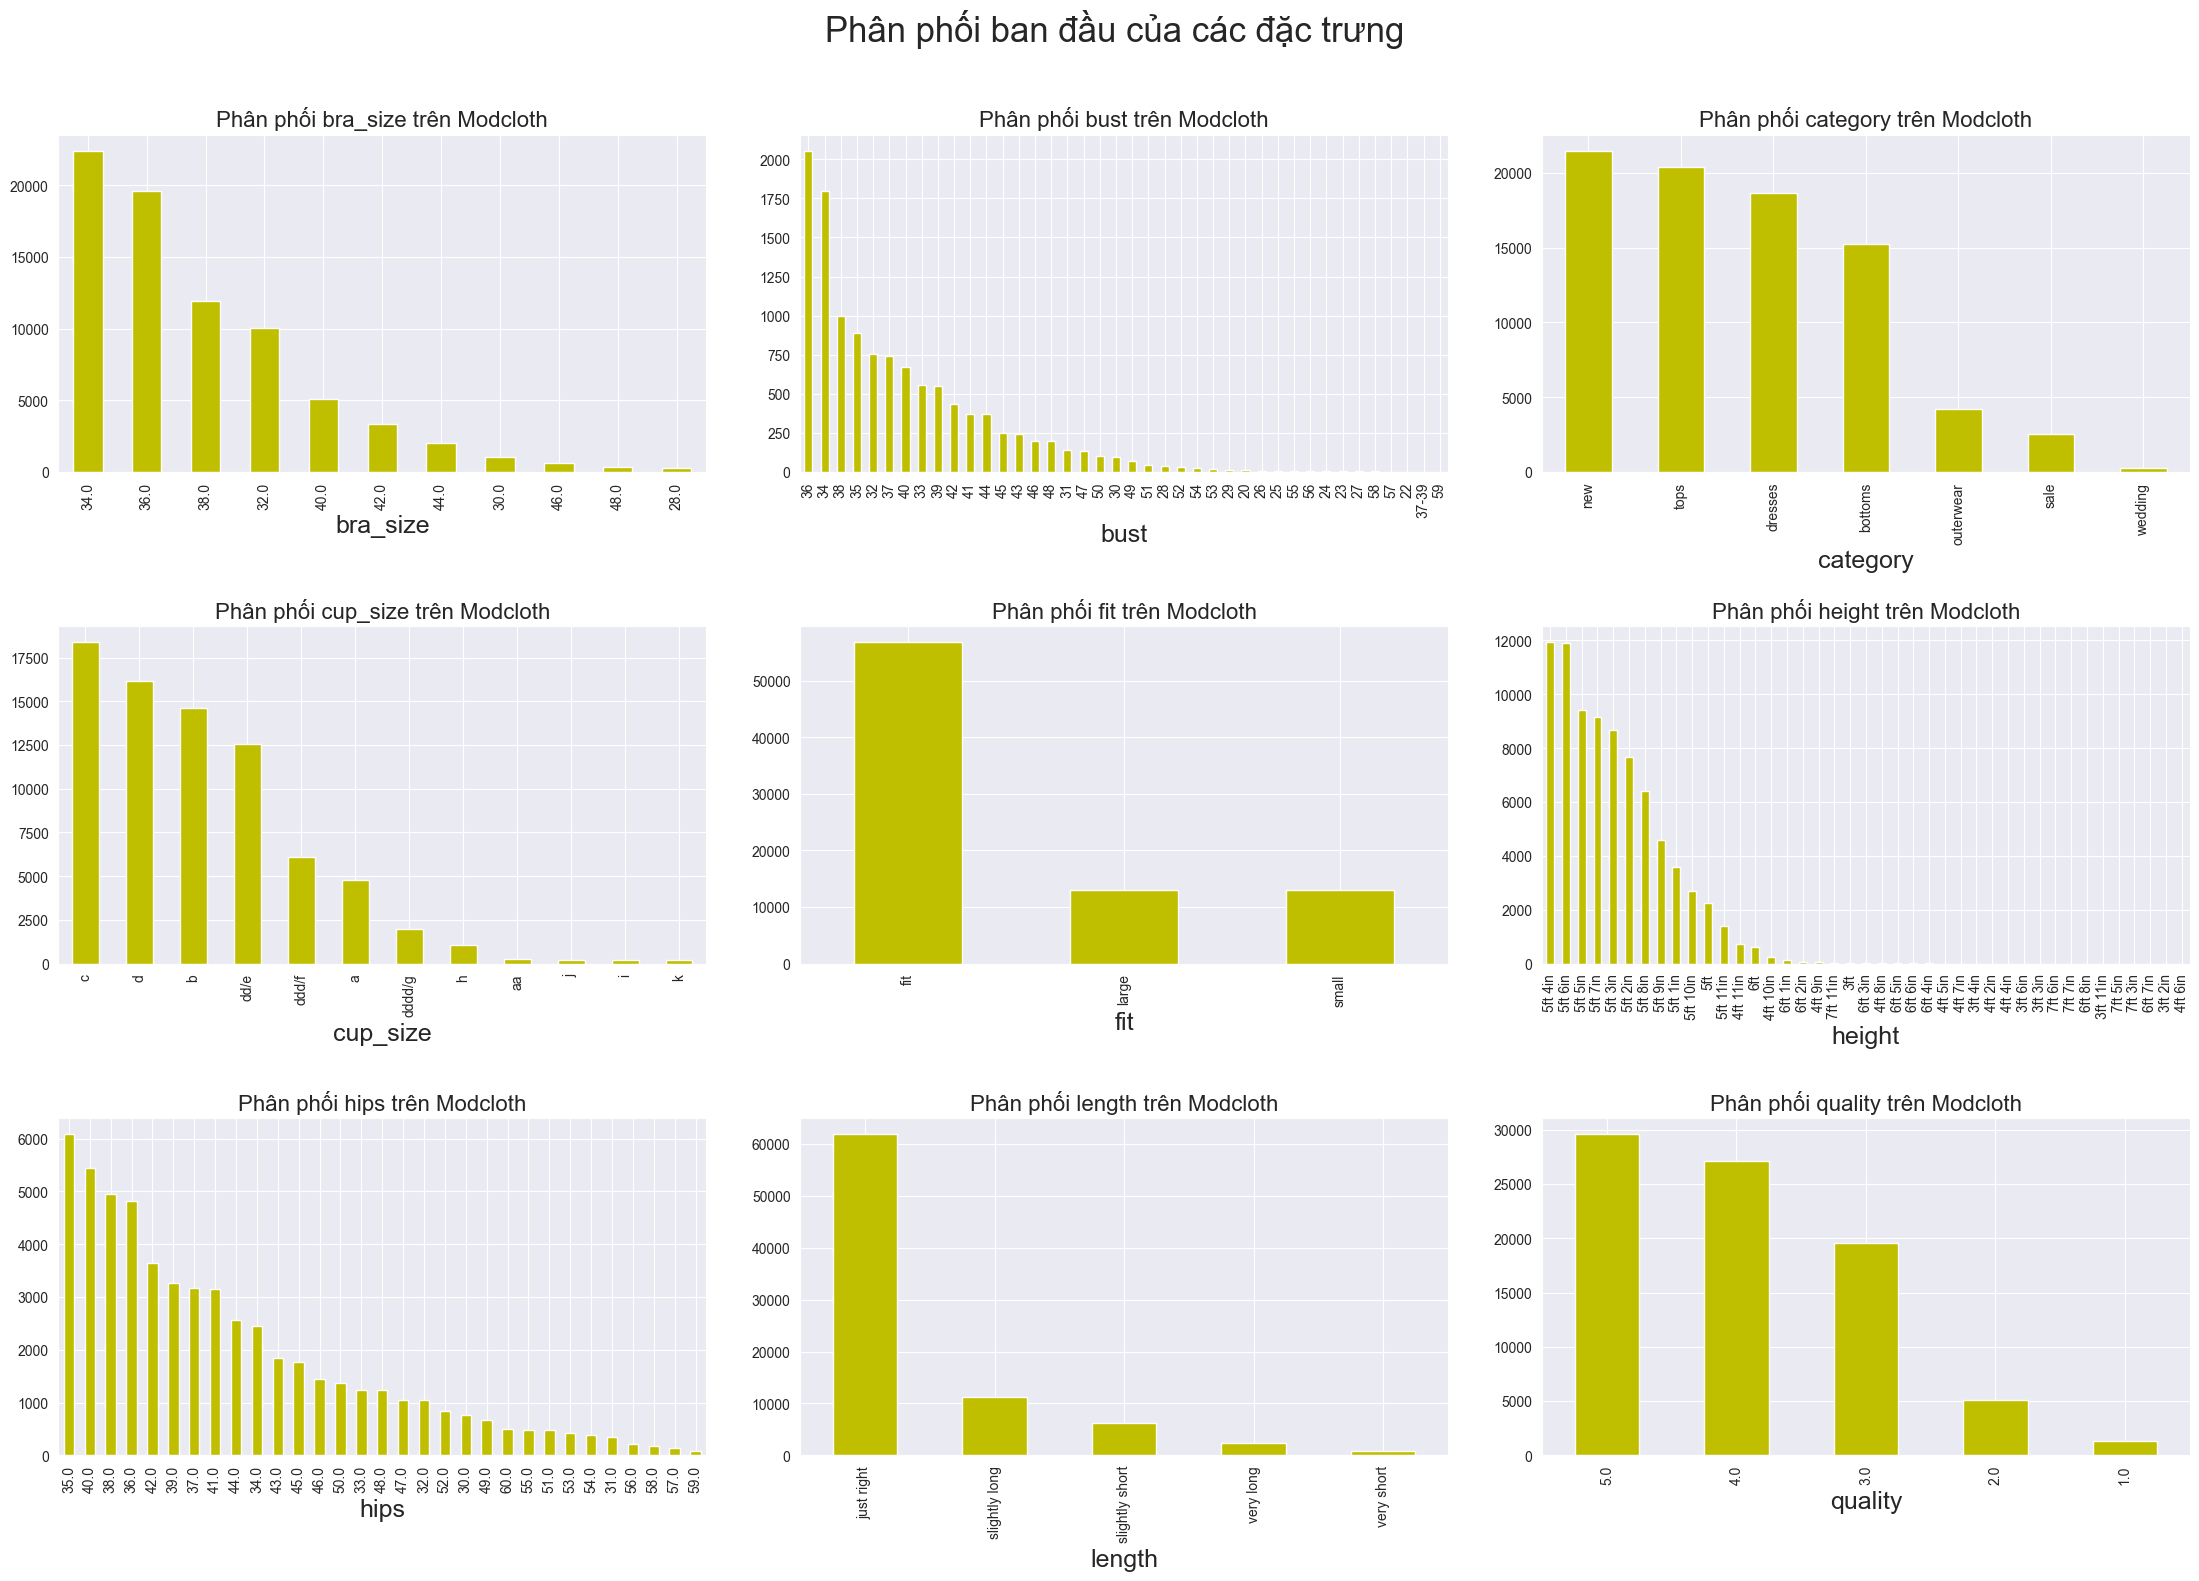

In [ ]:
# Hàm vẽ biểu đồ phân phối cho một cột (Đã cung cấp sẵn)
def plot_dist(col, ax):
    if col in mc_df.columns and mc_df[col].notnull().any():
        data_to_plot = mc_df[col][mc_df[col].notnull()]
        if data_to_plot.nunique() > 50:
             top_values = data_to_plot.value_counts().nlargest(50)
             top_values.plot(kind='bar', facecolor='y', ax=ax)
             ax.set_title(f"Phân phối {col} (Top 50) trên Modcloth", fontsize= 16)
        else:
             data_to_plot.value_counts().plot(kind='bar', facecolor='y', ax=ax)
             ax.set_title(f"Phân phối {col} trên Modcloth", fontsize= 16)
        ax.set_xlabel(f'{col}', fontsize=18)
        ax.tick_params(axis='x', rotation=90)
    else:
        ax.set_title(f"Cột '{col}' không có dữ liệu hoặc không tồn tại", fontsize=16)
        ax.set_xlabel(f'{col}', fontsize=18)
    return ax

# Bài tập 13: Vẽ phân phối ban đầu của một số đặc trưng
if 'mc_df' in locals():
    # Danh sách các cột cần vẽ phân phối
    cols_to_plot = ['bra_size','bust', 'category', 'cup_size', 'fit', 'height', 'hips', 'length', 'quality']
    # Lọc ra các cột thực sự tồn tại trong DataFrame
    existing_cols = [col for col in cols_to_plot if col in mc_df.columns]

    if existing_cols:
        n_cols_exist = len(existing_cols)
        n_rows = (n_cols_exist + 2) // 3
        n_cols_subplot = 3
        f, ax = plt.subplots(n_rows, n_cols_subplot, figsize=(22, 5 * n_rows))
        f.tight_layout(h_pad=9, w_pad=4, rect=[0, 0.03, 1, 0.95])
        ax = ax.flatten()

        k = 0
        for i in range(n_rows):
            for j in range(n_cols_subplot):
                if k < n_cols_exist:
                    # Gọi hàm plot_dist với cột và subplot tương ứng
                    plot_dist(existing_cols[k], ax[k])
                    k += 1
                else:
                     if k < len(ax):
                        ax[k].axis('off')
                     k += 1

        while k < len(ax):
            ax[k].axis('off')
            k += 1
        plt.suptitle("Phân phối ban đầu của các đặc trưng", fontsize= 25, y=1.02)
        plt.show()
    else:
        print("Không có cột nào trong danh sách `cols_to_plot` tồn tại trong DataFrame.")
else:
    print("DataFrame 'mc_df' chưa được tải.")


<a id="10"></a>
### Xử lý đặc trưng từng bước:

* **bra_size:** Mặc dù trông có vẻ là số, nó chỉ nằm trong khoảng từ 28 đến 48, với hầu hết các kích cỡ nằm trong khoảng 34-38. Việc chuyển đổi nó sang kiểu dữ liệu *category* là hợp lý. Chúng ta sẽ điền các giá trị NA vào một danh mục 'Unknown'. Chúng ta có thể thấy ở trên rằng hầu hết người mua có cỡ áo ngực là 34 hoặc 36.
* **bust**- Chúng ta có thể thấy bằng cách nhìn vào các giá trị không rỗng, rằng `bust` nên là kiểu dữ liệu số nguyên (integer). Chúng ta cũng cần xử lý một trường hợp đặc biệt khi `bust` được cung cấp là '37-39'. Chúng ta sẽ thay thế mục nhập '37-39' bằng giá trị trung bình, tức là 38, cho mục đích phân tích. Bây giờ chúng ta có thể chuyển đổi an toàn kiểu dữ liệu thành int. Tuy nhiên, xét rằng **khoảng 86% dữ liệu `bust` bị thiếu**, cuối cùng đã quyết định loại bỏ đặc trưng này.
* **category**- không có giá trị nào bị thiếu; thay đổi thành kiểu dữ liệu *category*.
* **cup size**- Thay đổi kiểu dữ liệu thành *category* cho cột này. Cột này có khoảng 7% giá trị bị thiếu. Xem xét các hàng mà giá trị này bị thiếu có thể gợi ý cho chúng ta cách xử lý các giá trị bị thiếu này.

In [ ]:
## fillna by Unknown and preprocessing as required

# Bài tập 14: Xử lý các cột bra_size, bust, category, cup_size
if 'mc_df' in locals():
    # Xử lý bra_size
    if 'bra_size' in mc_df.columns:
        mc_df['bra_size'] = mc_df['bra_size'].fillna('Unknown').astype('category')
        print("Đã xử lý 'bra_size'.")

    # Xử lý bust (loại bỏ)
    if 'bust' in mc_df.columns:
        mc_df.drop('bust', axis=1, inplace=True)
        print("Đã loại bỏ cột 'bust'.")

    # Xử lý category
    if 'category' in mc_df.columns:
        mc_df['category'] = mc_df['category'].astype('category')
        print("Đã xử lý 'category'.")

    # Xử lý cup_size
    if 'cup_size' in mc_df.columns:
        print("\nCác giá trị duy nhất trong 'cup_size' trước khi xử lý:")
        print(mc_df['cup_size'].unique()[:20])
        mc_df['cup_size'] = mc_df['cup_size'].fillna('Unknown').astype('category')
        print("\nĐã xử lý 'cup_size'.")
        print("Các giá trị duy nhất trong 'cup_size' sau khi xử lý:")
        print(mc_df['cup_size'].unique())
else:
    print("DataFrame 'mc_df' chưa được tải.")


Đã xử lý 'bra_size'.
Đã loại bỏ cột 'bust'.
Đã xử lý 'category'.

Các giá trị duy nhất trong 'cup_size' trước khi xử lý:
['d' 'b' 'dd/e' 'c' 'ddd/f' 'dddd/g' 'i' 'a' nan 'h' 'aa' 'j' 'k']

Đã xử lý 'cup_size'.
Các giá trị duy nhất trong 'cup_size' sau khi xử lý:
['d', 'b', 'dd/e', 'c', 'ddd/f', ..., 'Unknown', 'h', 'aa', 'j', 'k']
Length: 13
Categories (13, object): ['Unknown', 'a', 'aa', 'b', ..., 'h', 'i', 'j', 'k']


In [ ]:
# Bài tập 15: Hiển thị các mẫu có cup_size là 'Unknown'
if 'mc_df' in locals() and 'cup_size' in mc_df.columns and 'Unknown' in mc_df['cup_size'].cat.categories:
     print("\n20 mẫu ngẫu nhiên có cup_size là 'Unknown' (sau khi xử lý):")
     unknown_cup_size_df = mc_df[mc_df['cup_size'] == 'Unknown']
     print(unknown_cup_size_df.sample(min(20, len(unknown_cup_size_df))))
elif 'mc_df' in locals() and 'cup_size' in mc_df.columns:
     print("\nKhông tìm thấy giá trị 'Unknown' trong cột 'cup_size' đã xử lý.")
else:
     print("DataFrame 'mc_df' chưa được tải hoặc không có cột 'cup_size'.")



20 mẫu ngẫu nhiên có cup_size là 'Unknown' (sau khi xử lý):
       item_id  waist  size  quality cup_size  hips bra_size category  \
65164   673508    NaN    26      3.0  Unknown   NaN  Unknown  bottoms   
32863   407574    NaN     8      4.0  Unknown  38.0  Unknown      new   
40633   430795   33.0     4      4.0  Unknown  40.0  Unknown     tops   
35341   412737    NaN    15      4.0  Unknown   NaN  Unknown      new   
29426   404229    NaN    26      3.0  Unknown   NaN  Unknown      new   
63835   668696    NaN    12      3.0  Unknown   NaN  Unknown  bottoms   
18371   216517    NaN    12      5.0  Unknown   NaN  Unknown  dresses   
64319   668696    NaN    12      3.0  Unknown   NaN  Unknown  bottoms   
35866   414857    NaN    32      5.0  Unknown   NaN  Unknown      new   
49865   538258    NaN    20      5.0  Unknown   NaN  Unknown     tops   
44498   484879    NaN    26      1.0  Unknown   NaN  Unknown     tops   
26467   397005    NaN    12      3.0  Unknown   NaN  Unknown  d

In [37]:
print(mc_df['cup_size'].isnull().sum())  # Số lượng NaN còn lại


0


> Chúng ta không thể thấy bất cứ điều gì rõ ràng từ các hàng mà dữ liệu này bị thiếu, tuy nhiên, theo người quản lý bộ dữ liệu - "***Lưu ý rằng các bộ dữ liệu này rất thưa thớt, với hầu hết các sản phẩm và khách hàng chỉ có một giao dịch duy nhất.***" Điều đó chỉ ra rằng có lẽ những khách hàng này chưa mua đồ lót từ modcloth và do đó modcloth không có dữ liệu đó. Vì vậy, việc điền các giá trị null này là 'Unknown' là hợp lý. Từ sự phổ biến của các giá trị như dd/e, ddd/f và dddd/g, chúng ta có thể giả định đây là các cỡ cúp hợp lệ, cũng được xác nhận bởi bài viết [**này**](https://www.herroom.com/full-figure-bra-cup-sizing,905,30.html), trong đó một số thương hiệu thay đổi cỡ cúp dd thành e, ddd thành f, v.v. Chúng ta có thể chuyển đổi trực tiếp thành kiểu dữ liệu *category*.

* **fit**- Thay đổi kiểu dữ liệu thành *category* cho cột này. Chúng ta có thể thấy rằng đại đa số khách hàng đã đưa ra phản hồi 'vừa vặn' (fit) tốt cho các mặt hàng trên Modcloth!

In [ ]:
# Bài tập 16: Xử lý cột 'fit'
if 'mc_df' in locals():
    if 'fit' in mc_df.columns:
        print("Các giá trị duy nhất trong 'fit':", mc_df['fit'].unique())
        mc_df['fit'] = mc_df['fit'].astype('category')
        print("Đã xử lý 'fit'.")
        print("\nSố lượng theo 'fit':")
        # In ra số lượng của mỗi giá trị trong cột 'fit'
        print(mc_df['fit'].value_counts())
else:
    print("DataFrame 'mc_df' chưa được tải.")


Các giá trị duy nhất trong 'fit': ['small' 'fit' 'large']
Đã xử lý 'fit'.

Số lượng theo 'fit':
fit
fit      56757
large    13059
small    12974
Name: count, dtype: int64


* **height**- Chúng ta cần phân tích cú pháp cột chiều cao vì hiện tại nó là một đối tượng chuỗi, có dạng - Xft. Yin. Việc chuyển đổi chiều cao sang cm sẽ hợp lý. Chúng ta cũng xem xét các hàng mà dữ liệu chiều cao bị thiếu.

In [ ]:
import re # Import thư viện regular expression

# Bài tập 17: Viết hàm chuyển đổi chiều cao và áp dụng
# Hàm chuyển đổi chiều cao từ 'X ft Y in' hoặc 'X\'Y"' sang cm
def get_cms(x):
    if pd.isnull(x):
        return np.nan
    try:
        match = re.match(r"(\d+)\s*'\s*(\d+)\s*\"", x)
        if match:
            # Lấy giá trị feet và inches từ match.group() và chuyển thành số nguyên
            feet = int(match.group(1))
            inches = int(match.group(2))
            # Tính toán và trả về chiều cao bằng cm (1 ft = 30.48 cm, 1 in = 2.54 cm)
            return (feet * 30.48) + (inches * 2.54)
        else:
            return np.nan # Trả về NaN nếu không khớp định dạng
    except:
        return np.nan

if 'mc_df' in locals() and 'height' in mc_df.columns:
    print("Kiểu dữ liệu 'height' trước khi chuyển đổi:", mc_df['height'].dtype)
    print("Một số giá trị 'height' ban đầu:", mc_df['height'].unique()[:10])
    mc_df['height'] = mc_df['height'].apply(get_cms)

    print("\nKiểu dữ liệu 'height' sau khi chuyển đổi:", mc_df['height'].dtype)
    print("Một số giá trị 'height' sau khi chuyển đổi (cm):", mc_df['height'].unique()[:10])
    # In số lượng giá trị null trong cột 'height' sau khi chuyển đổi
    print(f"\nSố giá trị null trong 'height' sau khi chuyển đổi: { mc_df['height'].isnull().sum() }")

    # Mô tả cột height sau chuyển đổi
    print("\nMô tả cột 'height' sau khi chuyển đổi:")
    # Sử dụng .describe() cho cột 'height'
    print(mc_df['height'].describe())
else:
    print("DataFrame 'mc_df' chưa được tải hoặc không có cột 'height'.")


Kiểu dữ liệu 'height' trước khi chuyển đổi: object
Một số giá trị 'height' ban đầu: ['5ft 6in' '5ft 2in' '5ft 7in' nan '5ft 4in' '5ft 3in' '5ft 5in'
 '5ft 10in' '5ft 8in' '5ft']

Kiểu dữ liệu 'height' sau khi chuyển đổi: float64
Một số giá trị 'height' sau khi chuyển đổi (cm): [nan]

Số giá trị null trong 'height' sau khi chuyển đổi: 82790

Mô tả cột 'height' sau khi chuyển đổi:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: height, dtype: float64


In [ ]:
# Bài tập 18: Hiển thị các hàng có 'height' bị thiếu
if 'mc_df' in locals() and 'height' in mc_df.columns:
    missing_height_df = mc_df[mc_df['height'].isnull()]
    print(f"Số hàng có 'height' bị thiếu: {len(missing_height_df)}")
    print("\n20 hàng đầu có 'height' bị thiếu (sau khi xử lý):")
    cols_to_show = ['item_id', 'category', 'fit', 'height', 'bra_size', 'cup_size', 'hips', 'shoe_size', 'shoe_width', 'waist', 'user_id']
    existing_cols_to_show = [col for col in cols_to_show if col in mc_df.columns]
    # Hiển thị 20 hàng đầu của missing_height_df với các cột trong existing_cols_to_show
    print(missing_height_df[existing_cols_to_show].head(20))
else:
    print("DataFrame 'mc_df' chưa được tải hoặc không có cột 'height'.")


Số hàng có 'height' bị thiếu: 82790

20 hàng đầu có 'height' bị thiếu (sau khi xử lý):
    item_id category    fit  height bra_size cup_size  hips  shoe_size  \
0    123373      new  small     NaN     34.0        d  38.0        NaN   
1    123373      new  small     NaN     36.0        b  30.0        NaN   
2    123373      new  small     NaN     32.0        b   NaN        9.0   
3    123373      new    fit     NaN  Unknown     dd/e   NaN        NaN   
4    123373      new  small     NaN     36.0        b   NaN        NaN   
5    123373      new  small     NaN     36.0        c  41.0        NaN   
6    123373      new  large     NaN     32.0        b   NaN        NaN   
7    123373      new  small     NaN     38.0        d  42.0        8.5   
8    123373      new  small     NaN     42.0        d  50.0       11.0   
9    123373      new    fit     NaN     36.0     dd/e  41.0        9.0   
10   123373      new  small     NaN     40.0        d  49.0        NaN   
11   123373      new  sma

> Việc lọc này cho chúng ta những quan sát thú vị ở đây:
>
> 1. Một số khách hàng đã cung cấp dữ liệu `bra_size`, `cup_size`, trong khi tất cả các số đo khác đều trống - có thể là lần mua hàng đầu tiên tại Modcloth cho đồ lót!
> 2. Một số khách hàng đã cung cấp `shoe_size` và tất cả các số đo khác đều trống - có thể là lần mua hàng đầu tiên tại Modcloth cho giày!
>
> Điều đó dẫn chúng ta đến việc nói rằng có một số người mua lần đầu trong bộ dữ liệu, cũng được các tác giả của dữ liệu đề cập trong [1] - về sự thưa thớt của dữ liệu do 1 giao dịch! Ngoài ra, vì chúng ta không có dữ liệu về chiều cao của những khách hàng này, nên chỉ có lý khi để lại các giá trị bị thiếu trong cột và **có thể loại bỏ các hàng này để lập mô hình thống kê trong tương lai.** Chúng ta đã loại bỏ các hàng tương ứng. (Lưu ý: Mã trong notebook gốc không xóa các hàng này ở bước này, cần xác nhận lại logic)
>
> <a id="11"></a>
> # Kỹ thuật đặc trưng (Feature Engineering)
>
> ## Tạo một đặc trưng mới: first_time_user
>
> Dựa trên các quan sát của chúng ta ở trên, việc xác định các giao dịch thuộc về người dùng lần đầu là hợp lý. Chúng ta sử dụng logic sau để xác định các giao dịch như vậy:
>
> * Nếu `bra_size`/`cup_size` có giá trị và `height`, `hips`, `shoe_size`, `shoe_width` và `waist` không có - đó là người mua đồ lót lần đầu.
> * Nếu `shoe_size`/`shoe_width` có giá trị và `bra_size`, `cup_size`, `height`, `hips`, và `waist` không có - đó là người mua giày lần đầu.
> * Nếu `hips`/`waist` có giá trị và `bra_size`, `cup_size`, `height`, `shoe_size`, và `shoe_width` không có - đó là người mua váy/áo lần đầu.
>
> Dưới đây chúng ta sẽ xác minh logic trên, với các mẫu, trước khi chúng ta tạo đặc trưng mới.
>
> **1. Xem xét một vài hàng mà `bra_size` hoặc `cup_size` tồn tại, nhưng không có số đo nào khác.**
> **2. Xem xét một vài hàng mà `shoe_size` hoặc `shoe_width` tồn tại, nhưng không có số đo nào khác.**
> **3. Xem xét một vài hàng mà `hips` hoặc `waist` tồn tại, nhưng không có số đo nào khác.**

In [ ]:
# Bài tập 19: Xác định các điều kiện cho người dùng lần đầu
if 'mc_df' in locals():
    required_cols = ['bra_size', 'cup_size', 'height', 'hips', 'shoe_size', 'shoe_width', 'waist']
    if all(col in mc_df.columns for col in required_cols):

        lingerie_cond = (
            ((mc_df['bra_size'] != 'Unknown') | (mc_df['cup_size'] != 'Unknown')) &
            (mc_df['height'].isnull()) &
            (mc_df['hips'].isnull()) &
            (mc_df['shoe_size'].isnull()) &
            (mc_df['shoe_width'].isnull()) &
            (mc_df['waist'].isnull())
        )
        print("--- Mẫu người mua đồ lót lần đầu ---")
        print(mc_df[lingerie_cond][required_cols + ['category']].head())

        shoe_width_notnull_check = (
            mc_df['shoe_width'].notnull() if pd.api.types.is_numeric_dtype(mc_df['shoe_width'])
            else (mc_df['shoe_width'] != 'Unknown')
        )
        shoe_cond = (
            (mc_df['bra_size'] == 'Unknown') & (mc_df['cup_size'] == 'Unknown') &
            (mc_df['height'].isnull()) & (mc_df['hips'].isnull()) & (mc_df['waist'].isnull()) &
            ((mc_df['shoe_size'].notnull()) | shoe_width_notnull_check)
        )
        print("\n--- Mẫu người mua giày lần đầu ---")
        print(mc_df[shoe_cond][required_cols + ['category']].head())

        shoe_width_isnull_check = (
            mc_df['shoe_width'].isnull() if pd.api.types.is_numeric_dtype(mc_df['shoe_width'])
            else (mc_df['shoe_width'] == 'Unknown')
        )
        dress_cond = (
            (mc_df['bra_size'] == 'Unknown') & (mc_df['cup_size'] == 'Unknown') &
            mc_df['height'].isnull() &
            (mc_df['hips'].notnull() | mc_df['waist'].notnull()) &
            mc_df['shoe_size'].isnull() & shoe_width_isnull_check
        )
        print("\n--- Mẫu người mua váy/áo lần đầu ---")
        print(mc_df[dress_cond][required_cols + ['category']].head())

    else:
        print("Một số cột cần thiết để xác định người dùng lần đầu không tồn tại hoặc chưa được xử lý.")
else:
    print("DataFrame 'mc_df' chưa được tải.")


--- Mẫu người mua đồ lót lần đầu ---
   bra_size cup_size  height  hips  shoe_size shoe_width  waist category
3   Unknown     dd/e     NaN   NaN        NaN        NaN    NaN      new
4      36.0        b     NaN   NaN        NaN        NaN    NaN      new
12     34.0        c     NaN   NaN        NaN        NaN    NaN      new
13     34.0     dd/e     NaN   NaN        NaN        NaN    NaN      new
17     36.0   dddd/g     NaN   NaN        NaN        NaN    NaN      new

--- Mẫu người mua giày lần đầu ---
    bra_size cup_size  height  hips  shoe_size shoe_width  waist category
61   Unknown  Unknown     NaN   NaN        NaN        NaN    NaN      new
70   Unknown  Unknown     NaN   NaN        NaN        NaN    NaN      new
72   Unknown  Unknown     NaN   NaN        NaN        NaN    NaN      new
99   Unknown  Unknown     NaN   NaN        NaN        NaN    NaN      new
101  Unknown  Unknown     NaN   NaN        NaN        NaN    NaN      new

--- Mẫu người mua váy/áo lần đầu ---
Empty D

> Bây giờ chúng ta thêm một cột mới vào dữ liệu gốc - `first_time_user`, là một đặc trưng bool cho biết liệu người dùng của một giao dịch có phải là người dùng lần đầu hay không. Điều này dựa trên cơ sở rằng Modcloth không có thông tin trước đó về người đó, thực tế có thể người dùng mới đã thực hiện nhiều giao dịch trong lần đầu tiên!

In [ ]:
    # Bài tập 20: Tạo cột 'first_time_user'
if 'mc_df' in locals():
    if all(col in mc_df.columns for col in required_cols):
        lingerie_cond = (
            ((mc_df['bra_size'] != 'Unknown') | (mc_df['cup_size'] != 'Unknown')) &
            (mc_df['height'].isnull()) &
            (mc_df['hips'].isnull()) &
            (mc_df['shoe_size'].isnull()) &
            (mc_df['shoe_width'].isnull()) &
            (mc_df['waist'].isnull())
        )

        shoe_width_notnull_check = (
            mc_df['shoe_width'].notnull() if pd.api.types.is_numeric_dtype(mc_df['shoe_width'])
            else (mc_df['shoe_width'] != 'Unknown')
        )
        shoe_cond = (
            (mc_df['bra_size'] == 'Unknown') & (mc_df['cup_size'] == 'Unknown') &
            (mc_df['height'].isnull()) & (mc_df['hips'].isnull()) & (mc_df['waist'].isnull()) &
            ((mc_df['shoe_size'].notnull()) | shoe_width_notnull_check)
        )

        shoe_width_isnull_check = (
            mc_df['shoe_width'].isnull() if pd.api.types.is_numeric_dtype(mc_df['shoe_width'])
            else (mc_df['shoe_width'] == 'Unknown')
        )
        dress_cond = (
            (mc_df['bra_size'] == 'Unknown') & (mc_df['cup_size'] == 'Unknown') &
            mc_df['height'].isnull() &
            (mc_df['hips'].notnull() | mc_df['waist'].notnull()) &
            mc_df['shoe_size'].isnull() & shoe_width_isnull_check
        )

        # In ra số lượng bản ghi khớp với từng điều kiện để kiểm tra
        print(f"Số lượng khớp điều kiện đồ lót: {lingerie_cond.sum()}")
        print(f"Số lượng khớp điều kiện giày: {shoe_cond.sum()}")
        print(f"Số lượng khớp điều kiện váy/áo: {dress_cond.sum()}")

        mc_df['first_time_user'] = (lingerie_cond | shoe_cond | dress_cond)
        print("\nĐã thêm cột 'first_time_user'!")
        # In tổng số giao dịch của người dùng lần đầu (tổng của cột 'first_time_user')
        print(f"Tổng số giao dịch của người dùng lần đầu (theo logic trên): { mc_df.first_time_user.sum() }")

        first_time_user_ids = mc_df[mc_df['first_time_user']]['user_id'].unique()
        print(f"Tổng số người dùng lần đầu duy nhất: {len(first_time_user_ids)}")

        # Kiểm tra một vài hàng được đánh dấu là first_time_user
        print("\nVí dụ về các hàng được đánh dấu là first_time_user=True:")
        # Lọc các hàng first_time_user=True và hiển thị các cột trong required_cols + ['first_time_user']
        print(mc_df[mc_df['first_time_user']][required_cols + ['first_time_user']].head())
    else:
        print("Không thể tạo cột 'first_time_user' do thiếu cột cần thiết hoặc cột chưa được xử lý.")
else:
    print("DataFrame 'mc_df' chưa được tải.")


Số lượng khớp điều kiện đồ lót: 16280
Số lượng khớp điều kiện giày: 4519
Số lượng khớp điều kiện váy/áo: 0

Đã thêm cột 'first_time_user'!
Tổng số giao dịch của người dùng lần đầu (theo logic trên): 20799
Tổng số người dùng lần đầu duy nhất: 13264

Ví dụ về các hàng được đánh dấu là first_time_user=True:
   bra_size cup_size  height  hips  shoe_size shoe_width  waist  \
3   Unknown     dd/e     NaN   NaN        NaN        NaN    NaN   
4      36.0        b     NaN   NaN        NaN        NaN    NaN   
12     34.0        c     NaN   NaN        NaN        NaN    NaN   
13     34.0     dd/e     NaN   NaN        NaN        NaN    NaN   
17     36.0   dddd/g     NaN   NaN        NaN        NaN    NaN   

    first_time_user  
3              True  
4              True  
12             True  
13             True  
17             True  


* **hips**-
  Cột `hips` có rất nhiều giá trị bị thiếu ~ 32.28%! Chúng ta biết dữ liệu này có thể bị thiếu vì Modcloth rất có thể chưa bao giờ nhận được dữ liệu này từ người dùng. Chúng ta không thể loại bỏ một phần dữ liệu đáng kể như vậy, vì vậy chúng ta cần một cách khác để xử lý đặc trưng này. Chúng ta sẽ phân loại dữ liệu (binning) - trên cơ sở các tứ phân vị. (Lưu ý: Mã gốc sử dụng các ngưỡng tùy chỉnh, không phải tứ phân vị).
* **length**- Chỉ có 35 hàng bị thiếu trong `length`, chúng ta sẽ xem xét chúng. Chúng ta thấy rằng rất có thể khách hàng đã không để lại phản hồi hoặc dữ liệu đã bị hỏng trong các hàng này. Tuy nhiên, chúng ta có thể suy luận (impute) các giá trị này bằng cách sử dụng các trường liên quan đến đánh giá (nếu chúng được điền!). Hoặc chúng ta cũng có thể đơn giản chọn loại bỏ các hàng này. Vì mục đích của phân tích này, chúng ta sẽ loại bỏ các hàng này.
* **quality**- Chỉ có 68 hàng bị thiếu trong `quality`, chúng ta đã xem xét chúng. Tương tự như `length`, khách hàng đã không để lại phản hồi hoặc dữ liệu đã bị hỏng trong các hàng này. Chúng ta sẽ loại bỏ các hàng này và chuyển đổi kiểu dữ liệu thành một biến thứ tự (category có thứ tự).

In [43]:
from pandas.api.types import CategoricalDtype

# Bài tập 21: Xử lý các cột hips, length, quality
if 'mc_df' in locals():
    # Xử lý cột hips ==> Chuyển đổi thành các khoảng (bins)
    if 'hips' in mc_df.columns:
        print(f"\nSố giá trị null trong 'hips' trước khi xử lý: {mc_df.hips.isnull().sum()}")
        # Điền giá trị NaN trong cột 'hips' bằng -1.0
        mc_df['hips'] = mc_df['hips'].fillna(-1.0)
        bins = [-5, 0, 31, 37, 40, 44, 75]
        labels = ['Unknown', 'XS', 'S', 'M', 'L', 'XL']
        # Sử dụng pd.cut để chia cột 'hips' thành các bin dựa trên bins và labels đã cho, right=False
        mc_df['hips'] = pd.cut(mc_df['hips'], bins=bins, labels=labels, right=False)
        print("Đã xử lý 'hips' (binning).")
        print("Phân phối 'hips' sau khi binning:")
        print(mc_df['hips'].value_counts())

    # Xử lý cột length ==> loại bỏ các hàng bị thiếu
    if 'length' in mc_df.columns:
        initial_rows = len(mc_df)
        # Lấy index của các hàng có 'length' bị thiếu
        missing_length_rows = mc_df[mc_df['length'].isnull()].index
        # Sử dụng .drop() để loại bỏ các hàng này (axis=0), inplace=True
        mc_df.drop(missing_length_rows, axis=0, inplace=True)
        print(f"\nĐã xử lý 'length': Loại bỏ {len(missing_length_rows)} hàng bị thiếu.")
        print(f"Số hàng còn lại: {len(mc_df)}")

    # Xử lý quality ==> loại bỏ các hàng bị thiếu và chuyển thành category có thứ tự
    if 'quality' in mc_df.columns:
        initial_rows = len(mc_df)
        # Lấy index của các hàng có 'quality' bị thiếu
        missing_quality_rows = mc_df[mc_df['quality'].isnull()].index
        # Sử dụng .drop() để loại bỏ các hàng này (axis=0), inplace=True
        mc_df.drop(missing_quality_rows, axis=0, inplace=True)
        print(f"\nĐã xử lý 'quality': Loại bỏ {len(missing_quality_rows)} hàng bị thiếu.")
        print(f"Số hàng còn lại: {len(mc_df)}")

        # Xác định thứ tự của các giá trị quality duy nhất (sử dụng sorted và .unique())
        quality_order = sorted(mc_df['quality'].unique())
        # Tạo kiểu CategoricalDtype với categories=quality_order và ordered=True
        quality_cat_type = CategoricalDtype(categories=quality_order, ordered=True)
        # Áp dụng kiểu dữ liệu này cho cột 'quality' sử dụng .astype()
        mc_df['quality'] = mc_df['quality'].astype(quality_cat_type)
        print("Đã chuyển 'quality' thành kiểu category có thứ tự.")
        print("Phân phối 'quality':")
        print(mc_df['quality'].value_counts())

else:
    print("DataFrame 'mc_df' chưa được tải.")



Số giá trị null trong 'hips' trước khi xử lý: 26726
Đã xử lý 'hips' (binning).
Phân phối 'hips' sau khi binning:
hips
Unknown    26726
S          15991
L          14075
XL         13855
M          11386
XS           757
Name: count, dtype: int64

Đã xử lý 'length': Loại bỏ 35 hàng bị thiếu.
Số hàng còn lại: 82755

Đã xử lý 'quality': Loại bỏ 58 hàng bị thiếu.
Số hàng còn lại: 82697
Đã chuyển 'quality' thành kiểu category có thứ tự.
Phân phối 'quality':
quality
5.0    29598
4.0    27107
3.0    19521
2.0     5129
1.0     1342
Name: count, dtype: int64


* **review_summary/ review_text**- Các giá trị NA tồn tại vì các đánh giá này đơn giản là không được khách hàng cung cấp. Chúng ta chỉ cần điền chúng là 'Unknown'.
* **shoe_size** - Khoảng 66.3% dữ liệu `shoe_size` bị thiếu. Chúng ta sẽ thay đổi `shoe_size` thành kiểu dữ liệu *category* và điền các giá trị NA là 'Unknown'.
* **shoe_width** - Khoảng 77.5% dữ liệu `shoe_width` bị thiếu. Chúng ta sẽ điền các giá trị NA là 'Unknown' và chuyển thành kiểu category có thứ tự.
* **waist**- Cột `waist` có số lượng giá trị bị thiếu cao nhất - 96.5%! Chúng ta sẽ loại bỏ cột này.
* **bust**- 85.6% giá trị bị thiếu và tương quan cao với `bra_size`. Loại bỏ. (Đã loại bỏ ở bước trước)
* **user_name**- `user_name` không cần thiết khi đã có `user_id`. Loại bỏ.

Để chuyển đổi `shoe_width` thành kiểu category có thứ tự, chúng ta phải import `CategoricalDtype` và cung cấp thứ tự của các category.

In [44]:
if 'mc_df' in locals():
    # Xử lý review_summary/review_text
    if 'review_summary' in mc_df.columns:
        # Điền giá trị NaN trong 'review_summary' bằng 'Unknown'
        mc_df['review_summary'] = mc_df['review_summary'].fillna('Unknown')
        print("Đã xử lý 'review_summary'.")
    if 'review_text' in mc_df.columns:
        # Điền giá trị NaN trong 'review_text' bằng 'Unknown'
        mc_df['review_text'] = mc_df['review_text'].fillna('Unknown')
        print("Đã xử lý 'review_text'.")

    # Xử lý shoe_size
    if 'shoe_size' in mc_df.columns:
        # Điền giá trị NaN trong 'shoe_size' bằng 'Unknown'
        mc_df['shoe_size'] = mc_df['shoe_size'].fillna('Unknown')
        # Chuyển đổi kiểu dữ liệu của 'shoe_size' thành 'category'
        mc_df['shoe_size'] = mc_df['shoe_size'].astype('category')
        print("\nĐã xử lý 'shoe_size'.")
        print("Phân phối 'shoe_size' (Top 10):")
        print(mc_df['shoe_size'].value_counts().head(10))

    # Xử lý shoe_width
    if 'shoe_width' in mc_df.columns:
        print(f"\nSố giá trị null trong 'shoe_width' trước khi xử lý: {mc_df.shoe_width.isnull().sum()}")
        # Điền giá trị NaN trong 'shoe_width' bằng 'Unknown'
        mc_df['shoe_width'] = mc_df['shoe_width'].fillna('Unknown')

        # Xác định thứ tự (ví dụ)
        unique_widths = [w for w in mc_df['shoe_width'].unique() if w != 'Unknown']
        width_order = ['Unknown']
        if 'narrow' in unique_widths: width_order.append('narrow')
        if 'average' in unique_widths: width_order.append('average')
        if 'wide' in unique_widths: width_order.append('wide')
        remaining_widths = [w for w in unique_widths if w not in width_order]
        width_order.extend(sorted(remaining_widths))

        print("Thứ tự giả định cho 'shoe_width':", width_order)
        try:
            # Tạo CategoricalDtype với categories=width_order, ordered=True
            shoe_width_cat_type = CategoricalDtype(categories=width_order, ordered=True)
            # Áp dụng kiểu dữ liệu này cho cột 'shoe_width'
            mc_df['shoe_width'] = mc_df['shoe_width'].astype(shoe_width_cat_type)
            print("Đã xử lý 'shoe_width' (thành category có thứ tự).")
        except ValueError as e:
            print(f"Lỗi khi chuyển 'shoe_width' thành category có thứ tự: {e}")
            print("Chuyển 'shoe_width' thành category thông thường.")
            mc_df['shoe_width'] = mc_df['shoe_width'].astype('category')

        print("Phân phối 'shoe_width':")
        print(mc_df['shoe_width'].value_counts())

    # Xử lý waist (loại bỏ)
    if 'waist' in mc_df.columns:
        # Loại bỏ cột 'waist' (axis=1, inplace=True)
        mc_df.drop('waist', axis=1, inplace=True)
        print("\nĐã loại bỏ cột 'waist'.")

    # Xử lý user_name (loại bỏ)
    if 'user_name' in mc_df.columns:
        # Loại bỏ cột 'user_name' (axis=1, inplace=True)
        mc_df.drop('user_name', axis=1, inplace=True)
        print("Đã loại bỏ cột 'user_name'.")

else:
    print("DataFrame 'mc_df' chưa được tải.")


Đã xử lý 'review_summary'.
Đã xử lý 'review_text'.

Đã xử lý 'shoe_size'.
Phân phối 'shoe_size' (Top 10):
shoe_size
Unknown    54821
8.5         3972
8.0         3822
7.5         3701
9.0         3598
7.0         3192
10.0        2418
6.5         1826
9.5         1802
6.0         1336
Name: count, dtype: int64

Số giá trị null trong 'shoe_width' trước khi xử lý: 64116
Thứ tự giả định cho 'shoe_width': ['Unknown', 'narrow', 'average', 'wide']
Đã xử lý 'shoe_width' (thành category có thứ tự).
Phân phối 'shoe_width':
shoe_width
Unknown    64116
average    13079
wide        3954
narrow      1548
Name: count, dtype: int64

Đã loại bỏ cột 'waist'.
Đã loại bỏ cột 'user_name'.


In [45]:
if 'mc_df' in locals():
    print("\nThông tin DataFrame sau khi làm sạch và tiền xử lý:")
    # Hiển thị thông tin DataFrame bằng .info()
    mc_df.info()

    # Kiểm tra lại các giá trị bị thiếu
    print("\nKiểm tra lại dữ liệu bị thiếu:")
    # Tính tổng số giá trị null cho mỗi cột
    print(mc_df.isnull().sum())
else:
    print("DataFrame 'mc_df' chưa được tải.")



Thông tin DataFrame sau khi làm sạch và tiền xử lý:
<class 'pandas.core.frame.DataFrame'>
Index: 82697 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   item_id          82697 non-null  int64   
 1   size             82697 non-null  int64   
 2   quality          82697 non-null  category
 3   cup_size         82697 non-null  category
 4   hips             82697 non-null  category
 5   bra_size         82697 non-null  category
 6   category         82697 non-null  category
 7   height           0 non-null      float64 
 8   length           82697 non-null  object  
 9   fit              82697 non-null  category
 10  user_id          82697 non-null  int64   
 11  shoe_size        82697 non-null  category
 12  shoe_width       82697 non-null  category
 13  review_summary   82697 non-null  object  
 14  review_text      82697 non-null  object  
 15  first_time_user  82697 non-null  bool  

We can see that now there are no more missing values! We can move onto visualizing and gaining more insight about the data.

<a id="12"></a>
# EDA via visualizations

<a id="13"></a>
<a id='dist_plots'></a>
## 1. Distribution of different features over Modcloth dataset

In [ ]:

# Vẽ biểu đồ density  của các cột trong data Modcloth
def plot_dist(col, ax):
    ...

cols = ['bra_size','category', 'cup_size', 'fit', 'height', 'hips', 'length', 'quality']
k = 0
for i in range(2):
    for j in range(4):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Final Distributions of different features", fontsize= 23)

<a id="14"></a>
## 2. Categories vs. Fit/Length/Quality
Here, we will visualize how the items of different categories fared in terms of - fit, length, and quality. This will tell Modcloth which categories need more attention!

I have plotted 2 distributions in categories here:

**1. Unnormalized**- viewing the frequency counts directly- for comparison across categories. We also include the best fit, length, or quality measure in this plot.

**2. Normalized** -  viewing the distribution for the category after normalizing the counts, amongst the category itself- it will help us compare what are major reason for return amongst the category itself. We exclude the best sizing & quality measures, so as to focus on the pre-dominant reasons of return per category (if any).

In [ ]:

def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  Modcloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)

def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm

In [ ]:
mc_df.category.value_counts()

<a id='references'></a>
# References:
    [1] Rishabh Misra, Mengting Wan, Julian McAuley Decomposing Fit Semantics for Product Size Recommendation in Metric Spaces. RecSys, 2018.
    
<a id='assumptions'></a>
# Assumptions:
The data source has been assumed as following on the Modcloth dataset:
* item_id- from item.
* waist- from user input.
* size - from item.
* quality- from user input.
* cup size- from user input.
* hips- from user input.
* bra size- from user input.
* category- from item.
* bust- from user input.
* height- from user input
* user_name- from user input
* length - from user input
* fit- from user input
* user_id- from user.


*sonnv*